<a href="https://colab.research.google.com/github/codeyumm/adl5500-yelp-sentiment-analysis/blob/main/yelp_restaurant_hotel_reviews_extract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Sem 2/Advanced Deep Learning - AIGC-5500-0NA/Final Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Sem 2/Advanced Deep Learning - AIGC-5500-0NA/Final Project


In [3]:
# We have two JSON files: one for business data, one for reviews.
# Each review links to a business via its business ID.
# We will loop through the business JSON and collect the IDs of businesses
# categorized as either "restaurant" or "hotel".
# Then, we'll use those IDs to extract relevant reviews from the review JSON.

In [4]:
business_df = pd.read_json("./yelp-dataset/yelp_academic_dataset_business.json", lines=True)

In [5]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


### How many categories does the dataset have?

In [6]:
business_df['categories']

,categories
0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,"Shipping Centers, Local Services, Notaries, Ma..."
2,"Department Stores, Shopping, Fashion, Home & G..."
3,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,"Brewpubs, Breweries, Food"
...,...
150341,"Nail Salons, Beauty & Spas"
150342,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,"Fitness/Exercise Equipment, Eyewear & Optician..."


### But we just need restaurants or hotels.

In [7]:
business_df.isna().sum()

,0
business_id,0
name,0
address,0
city,0
state,0
postal_code,0
latitude,0
longitude,0
stars,0
review_count,0


In [8]:
business_df = business_df.dropna(subset=['categories'])

In [9]:
# finding all business which have restaurants or hotels in thier category.

# filtering
res_hotel_df = business_df[
    business_df['categories'].str.contains("hotel|hotels|restaurant|restaurants", case=False, na=False)
]

In [10]:
res_hotel_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


### Now, we can easily extract business IDs and make a list to get the reviews.

In [11]:
rest_hotel_business_ids = res_hotel_df['business_id'].tolist()

In [12]:
print(f"We have total {len(rest_hotel_business_ids)} business which are having restaurant or hotel category.")

We have total 57722 business which are having restaurant or hotel category.


### Now, lets observe the review dataset and make the dataset we need for sentiment analysis.

### We were not able to use read_json() becasue reviews dataset size is 4gb so using open() and reading it line by line.

In [13]:
extracted_reviews = []
star_counter = [0, 0, 0, 0, 0]
max_labels = 10000
line_count = 0

with open('./yelp-dataset/yelp_academic_dataset_review.json','r', encoding='utf-8') as file:
  for line in file:
    line_count += 1

    # get one review and convert it to json
    review = json.loads(line)

    # check review exists for business ID
    if review['business_id'] in rest_hotel_business_ids:

      # check star and label counter
      star = int(review['stars']) - 1

      if star_counter[star] != max_labels:

        # increase the counter
        star_counter[star] += 1

        # add review to the list
        extracted_reviews.append(review)

        if star_counter[star] == max_labels:
          print(f"{star + 1}-star label reached {max_labels} reviews at line {line_count}.")

        if all(count == max_labels for count in star_counter):
          print("all labels reached the limit. Stopping data collection.")
          break



5-star label reached 10000 reviews at line 31489.
4-star label reached 10000 reviews at line 47870.
3-star label reached 10000 reviews at line 104202.
1-star label reached 10000 reviews at line 127167.
2-star label reached 10000 reviews at line 147482.
all labels reached the limit. Stopping data collection.


In [14]:
len(extracted_reviews)

50000

In [15]:
type(extracted_reviews)

list

In [16]:
df = pd.DataFrame(extracted_reviews)
df.to_csv('extracted_reviews.csv', index=False)

In [17]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    50000 non-null  object 
 1   user_id      50000 non-null  object 
 2   business_id  50000 non-null  object 
 3   stars        50000 non-null  float64
 4   useful       50000 non-null  int64  
 5   funny        50000 non-null  int64  
 6   cool         50000 non-null  int64  
 7   text         50000 non-null  object 
 8   date         50000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ MB


In [27]:
df['text_length'] = df['text'].apply(len)

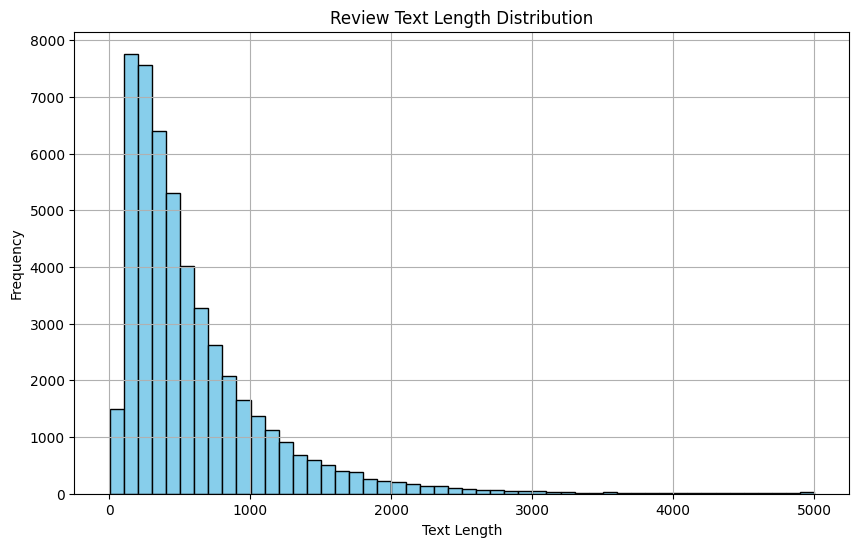

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['text_length'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Review Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()